<a href="https://colab.research.google.com/github/MatiasPavon/SIS420-IA/blob/main/Reg_log_02_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MATIAS HECTOR PAVON GRUPO 2

**MODELO DE REGRESION LOGISTICA (CLASIFICACION) LABORATORIO 2**

AQUI ES DONDE CONECTAMOS LA CUENTA DRIVE CON ESTE CUADERNILLO PARA PODER HACER USO DEL DATASET SELECCIONADO PARA ESTA TAREA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


AQUI ESTAN LOS PRIMEROS PASOS, IMPORTACION DE LIBRERIAS PARA REALIZAR LO QUE TENEMOS QUE HACER

In [20]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

AQUI ES DONDE CARGAMOS LOS DATOS DEL DATASET QUE TENEMOS, EN ESTE CASO ES UN DATASET QUE EN BASE A LAS X PODEMOS DETERMINAR SI UNA PERSONA ES FUMADORA O NO

In [21]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# contiene la etiqueta que indica si el alumno ingreso o no a la universidad.
data = np.loadtxt('/content/drive/MyDrive/Dataset/train_dataset modificado.csv', delimiter=',')
# X, y = data[:, 0:8], data[:, 8]
X_train, y_train = data[:31187,:21], data[:31187, 22]
X_test, y_test = data[31187:,:21], data[31187:, 22]
X = X_train
y = y_train
print(X)

[[  35.  170.   85. ...   61.  115.  125.]
 [  20.  175.  110. ...   19.   25.   30.]
 [  45.  155.   65. ... 1090. 1400.  276.]
 ...
 [  25.  170.   65. ...   21.   14.   15.]
 [  50.  170.   70. ...   49.   54.  283.]
 [  40.  160.   45. ...   16.    9.   17.]]


FUNCION SIGMOIDEA

In [7]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

NORMALIZADO

In [8]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [9]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [10]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [11]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [12]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.75253822  0.00598241  0.62519633 -0.09148203 -0.02864014  0.00980802
  0.00609798 -0.00872054  0.02722901 -0.11370938  0.0280596   0.10353086
 -0.10677103  0.28947279 -0.06890256 -0.07088165  0.66183901 -0.02832456
  0.07085881 -0.03393922 -0.15150132  0.46129613]


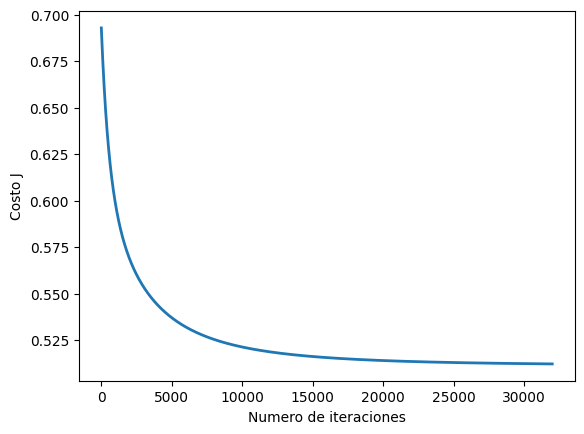

In [13]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 32000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [28]:
# verificar si ingresa o no a la universidad
# X_array = [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46]
X_norm, mu, sigma = featureNormalize(X_test)
m, n = X_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
aprueba = sigmoid(np.dot(X_test_norm, theta))   # Se debe cambiar esto
predicciones_binarias = np.round(aprueba).astype(int)
print(predicciones_binarias)
# Imprime los primeros 10 resultados
print("Primeros 20 resultados:", predicciones_binarias[:20])

# Imprime los últimos 10 resultados
print("Últimos 20 resultados:", predicciones_binarias[-20:])
#print('Una persona con los siguientes datos [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46] tiene como probabilida de ser diabetico:{:.0f}'.format(aprueba))

[1 0 1 ... 1 0 0]
Primeros 20 resultados: [1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0]
Últimos 20 resultados: [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]


COMPARACION CON DATOS DE PRUEBA

In [29]:
# Imprime los primeros 10 resultados
print("Primeros 20 resultados:", y_test[:20])

# Imprime los últimos 10 resultados
print("Últimos 20 resultados:", y_test[-20:])

Primeros 20 resultados: [0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
Últimos 20 resultados: [0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.]


Prueba con valor de X donde se sabe que la Y deberia ser 0 pero no hay el resultado esperado

In [17]:
X_array = [45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0]
predict = sigmoid(np.dot(X_array, theta))
print('Una persona con los siguientes datos [45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0] tiene como probabilida de ser fumador:{:.0f}'.format(predict))

Una persona con los siguientes datos [45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0] tiene como probabilida de ser fumador:1


Prueba con valor de X donde se sabe que la Y deberia ser 0 pero no hay el resultado esperado

In [18]:
X_array = [55,150,65,89.0,0.5,1.0,1,1,132,81,81,183,85,52,114,13.4,1,0.7,16,10,10,0]
predict = sigmoid(np.dot(X_array, theta))
print('Una persona con los siguientes datos [55,150,65,89.0,0.5,1.0,1,1,132,81,81,183,85,52,114,13.4,1,0.7,16,10,10,0] tiene como probabilida de ser fumador:{:.0f}'.format(predict))

Una persona con los siguientes datos [55,150,65,89.0,0.5,1.0,1,1,132,81,81,183,85,52,114,13.4,1,0.7,16,10,10,0] tiene como probabilida de ser fumador:1
